# Import library

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Initial Exploratory Data Analysis

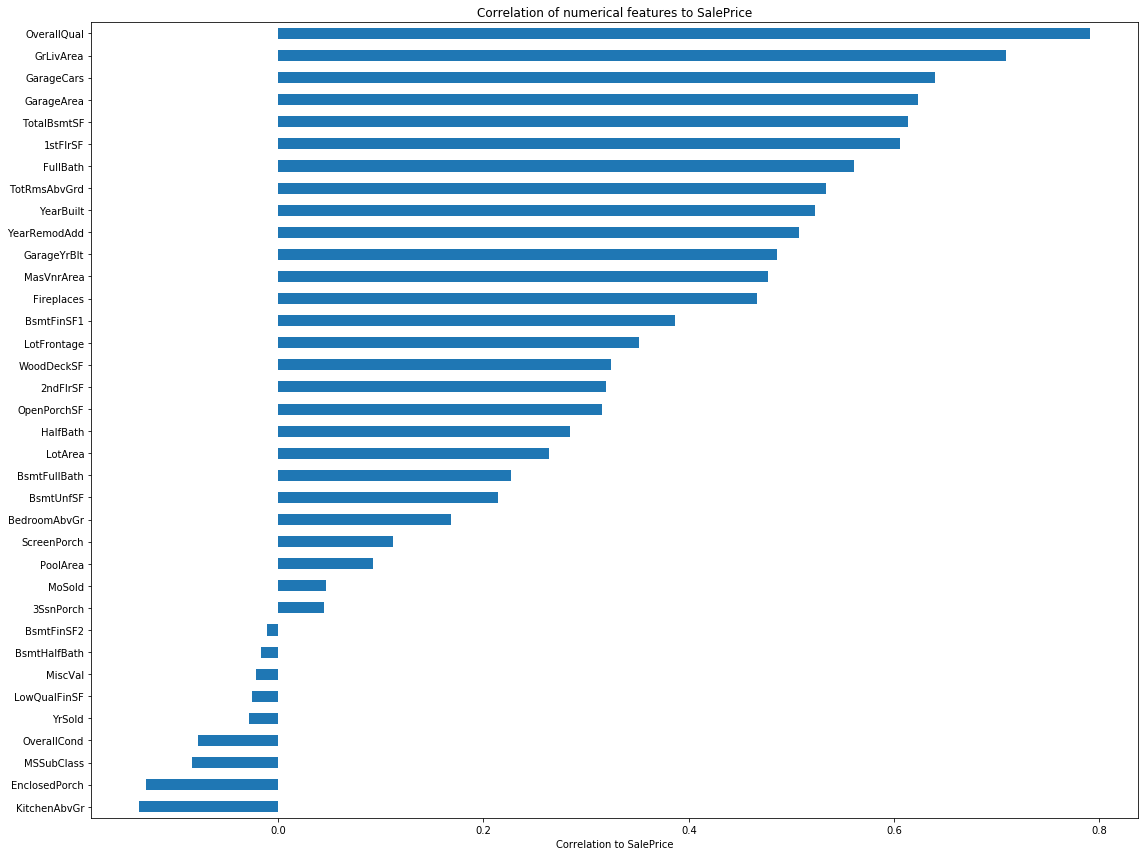

In [6]:
plt.figure(figsize=(16,12));
corr = df_train.corr()['SalePrice']

corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

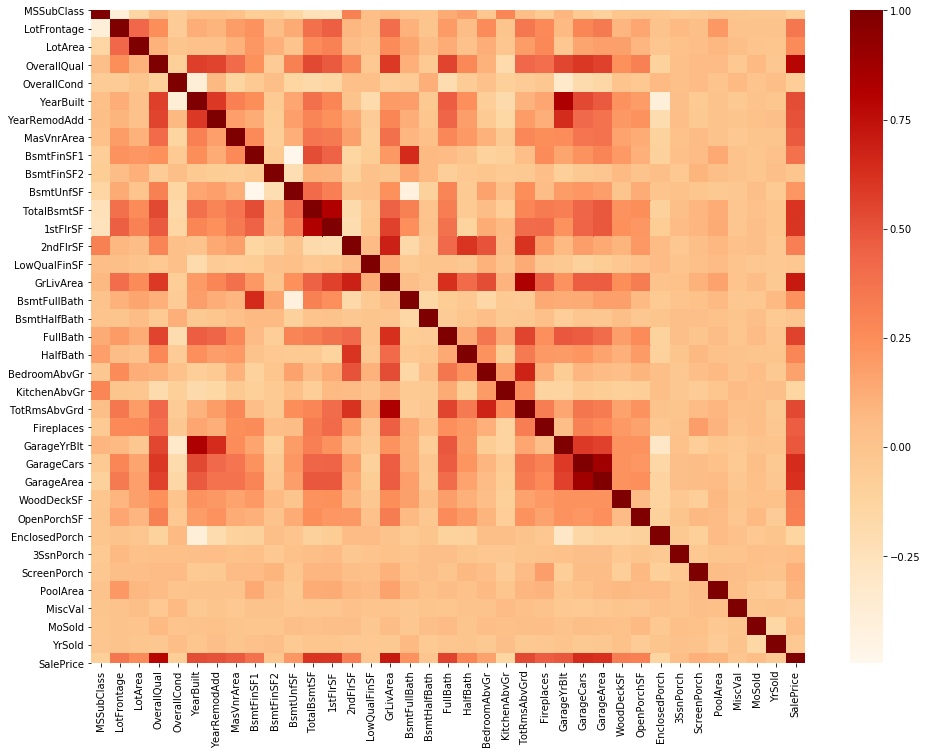

In [7]:
plt.figure(figsize=(16,12));
sns.heatmap(df_train.corr(), cmap = 'OrRd')

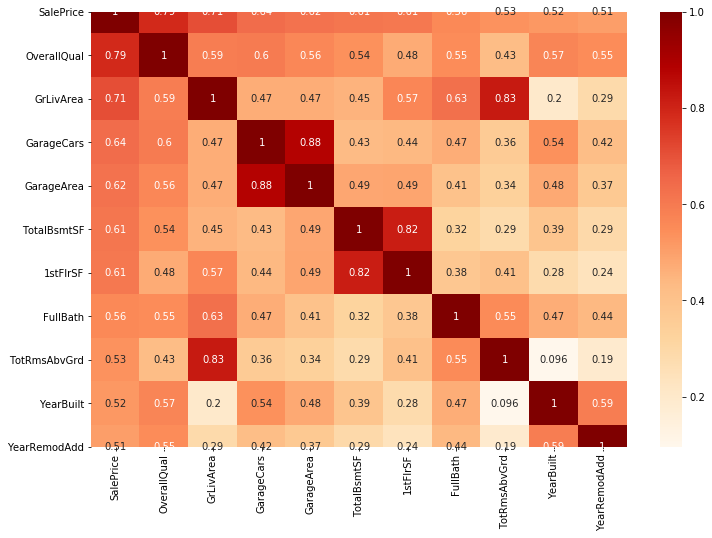

In [8]:
high_corr = df_train.corr()['SalePrice'][(abs(df_train.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)

plt.figure(figsize=(12,8));
sns.heatmap(df_train[high_corr.index].corr(), annot=True, cmap = 'OrRd')

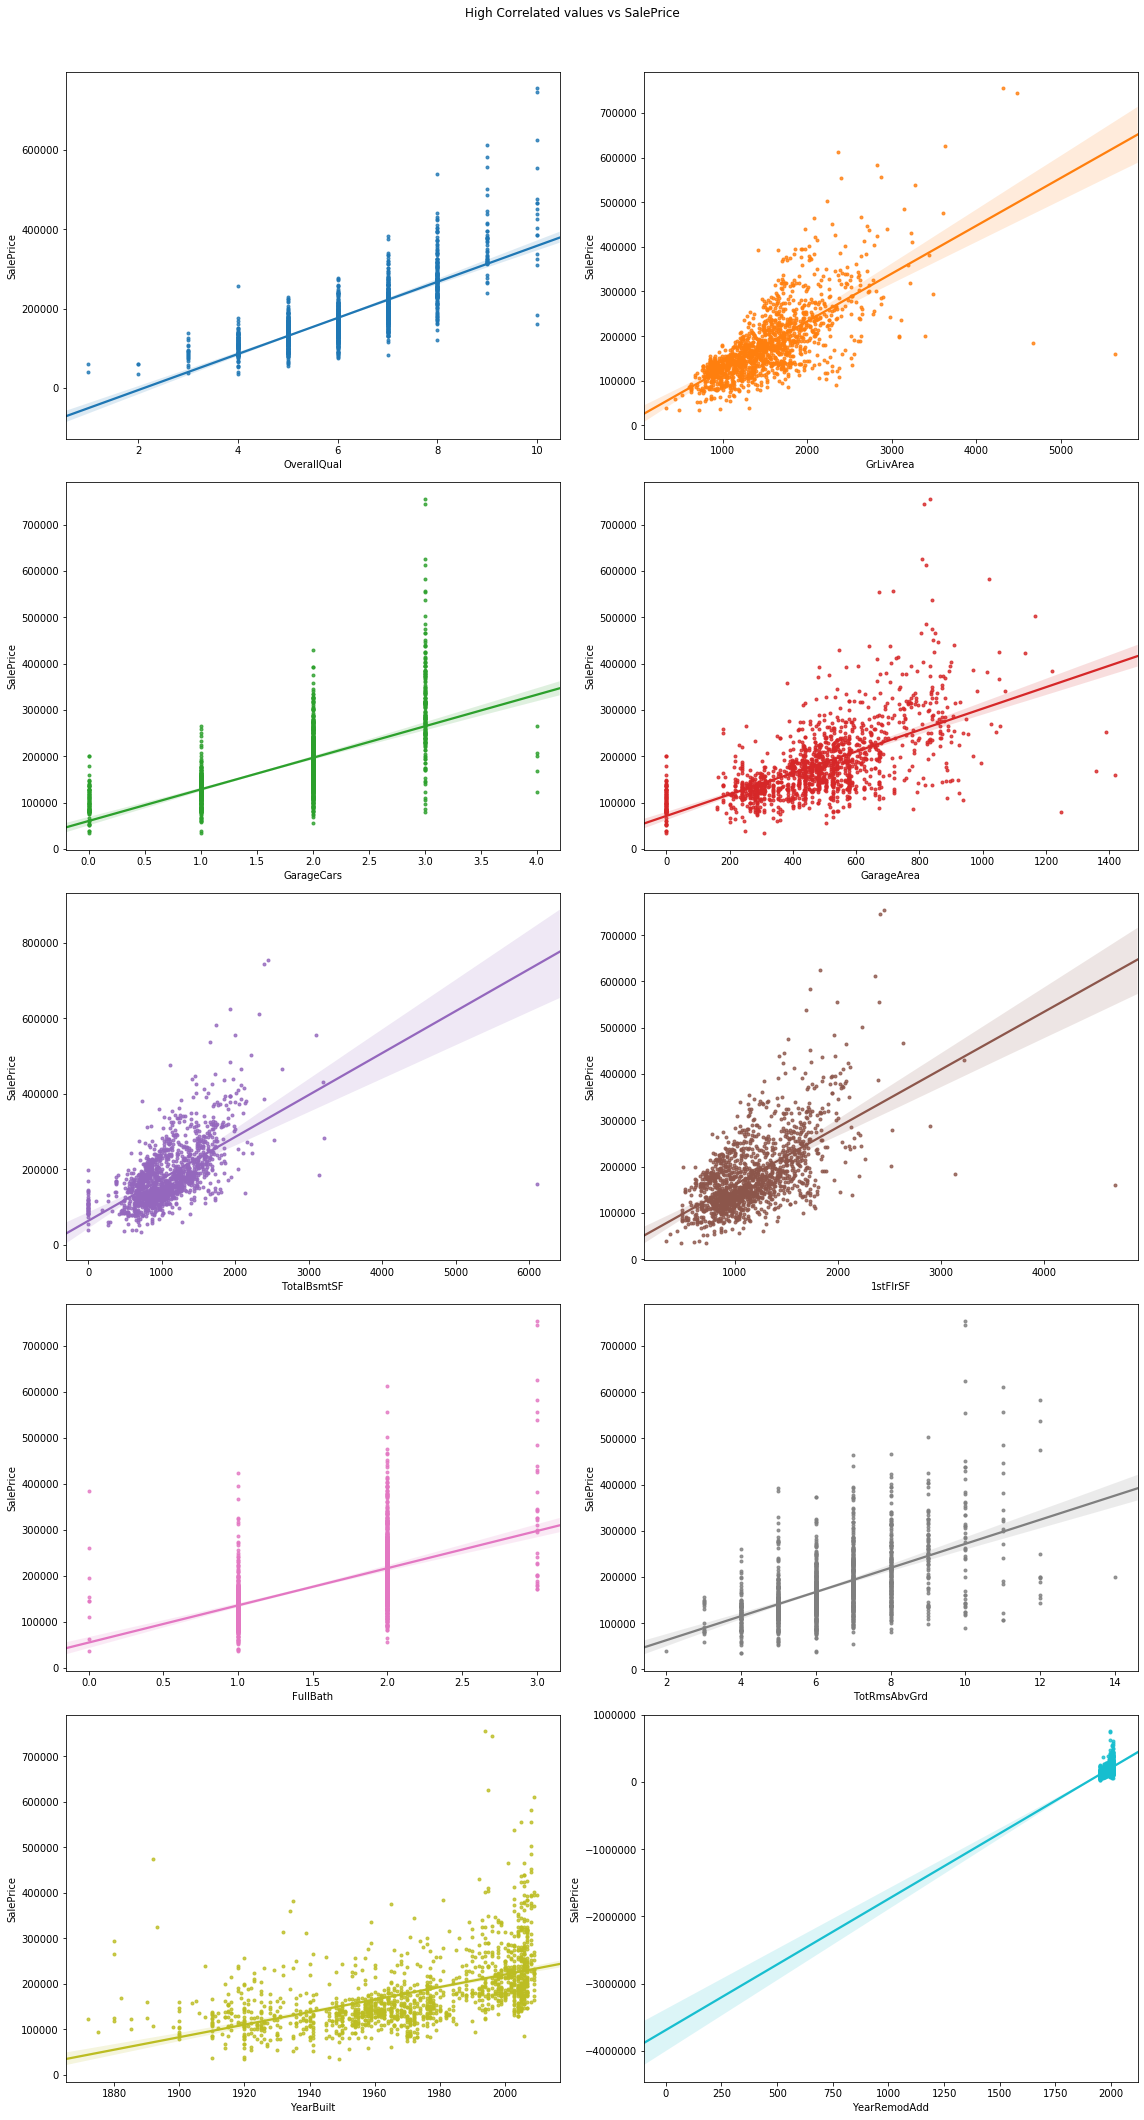

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(16,30))

for idx,col in enumerate(high_corr[1:].index):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2])  

fig.suptitle('High Correlated values vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

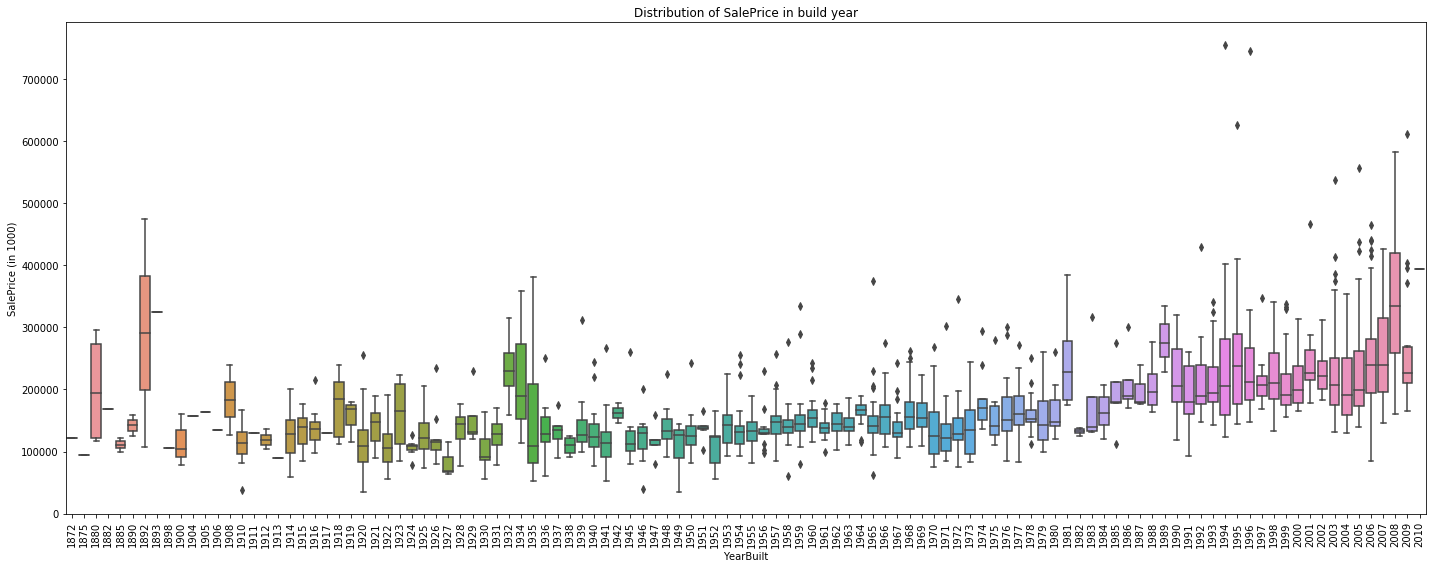

In [10]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)

plt.title("Distribution of SalePrice in build year")
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

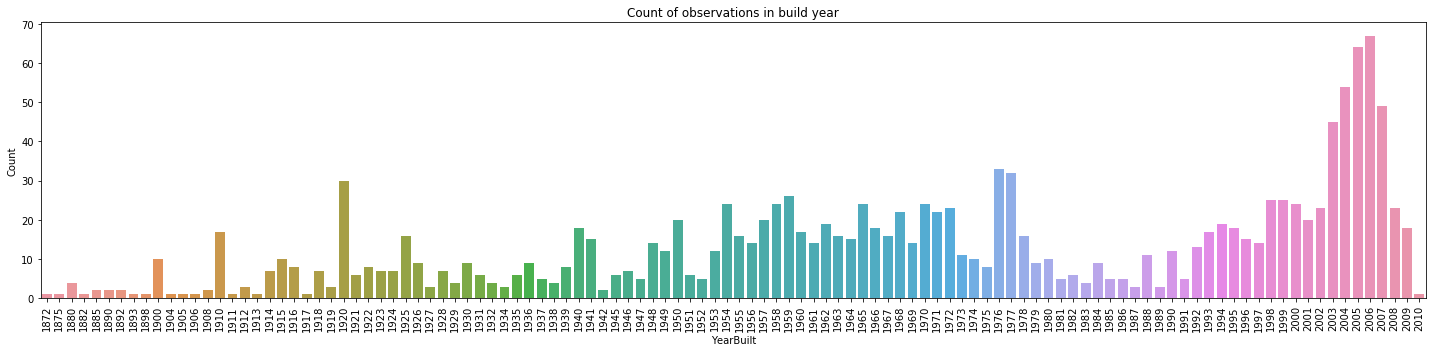

In [11]:
plt.figure(figsize=(20,5));
sns.countplot(data=df_train, x = 'YearBuilt')
plt.title("Count of observations in build year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

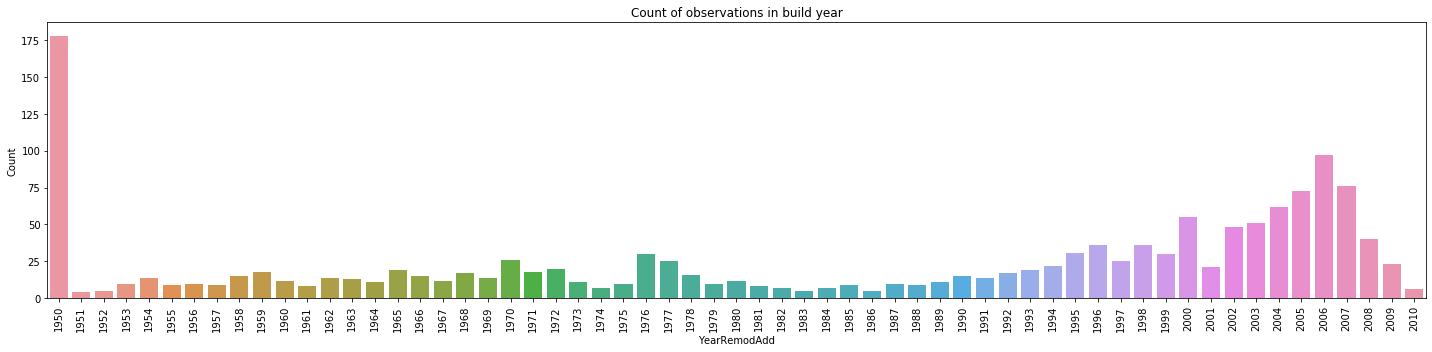

In [12]:
plt.figure(figsize=(20,5));
sns.countplot(data=df_train, x = 'YearRemodAdd')
plt.title("Count of observations in build year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

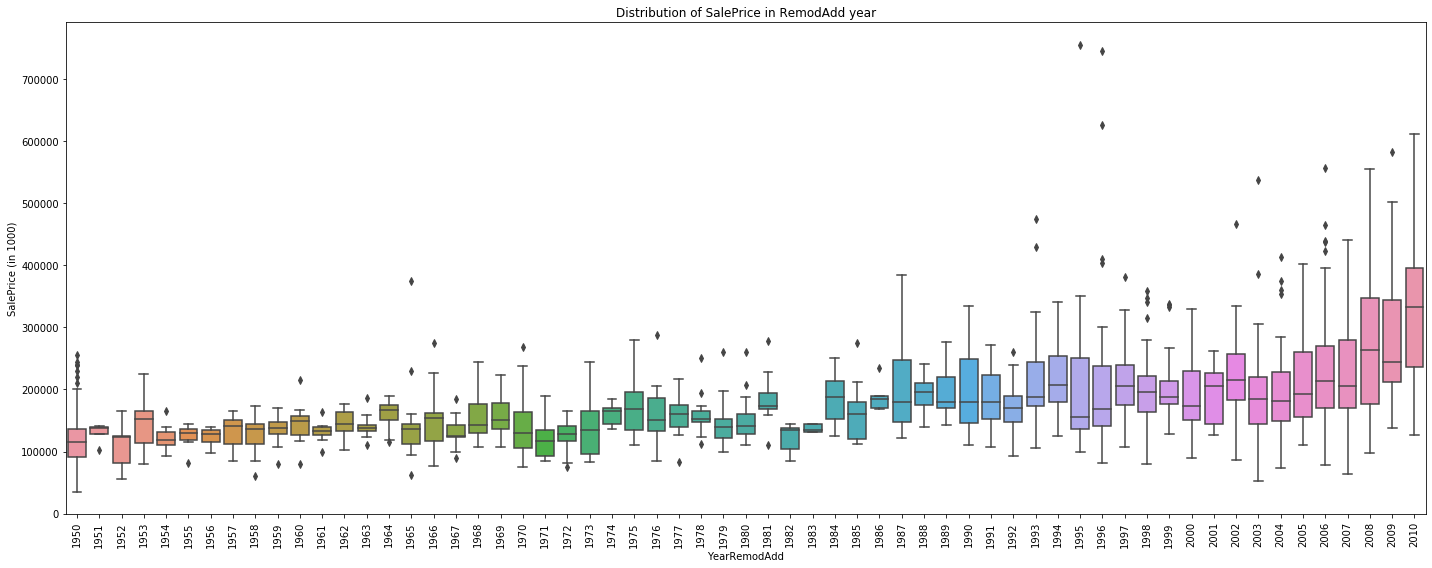

In [13]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=df_train)

plt.title("Distribution of SalePrice in RemodAdd year")
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
decades = np.arange(1870, 2020, 10)
df_cut = pd.cut(df_train['YearBuilt'], bins=decades, labels=decades[:-1])
df_comb = pd.concat([df_cut, df_train.SalePrice], axis=1)

In [15]:
df_cut

0       2000
1       1970
2       2000
3       1910
4       1990
        ... 
1455    1990
1456    1970
1457    1940
1458    1940
1459    1960
Name: YearBuilt, Length: 1460, dtype: category
Categories (14, int64): [1870 < 1880 < 1890 < 1900 ... 1970 < 1980 < 1990 < 2000]

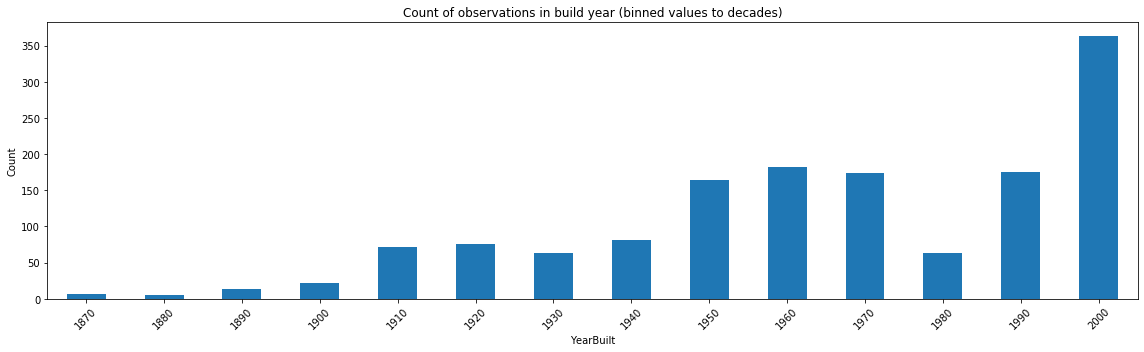

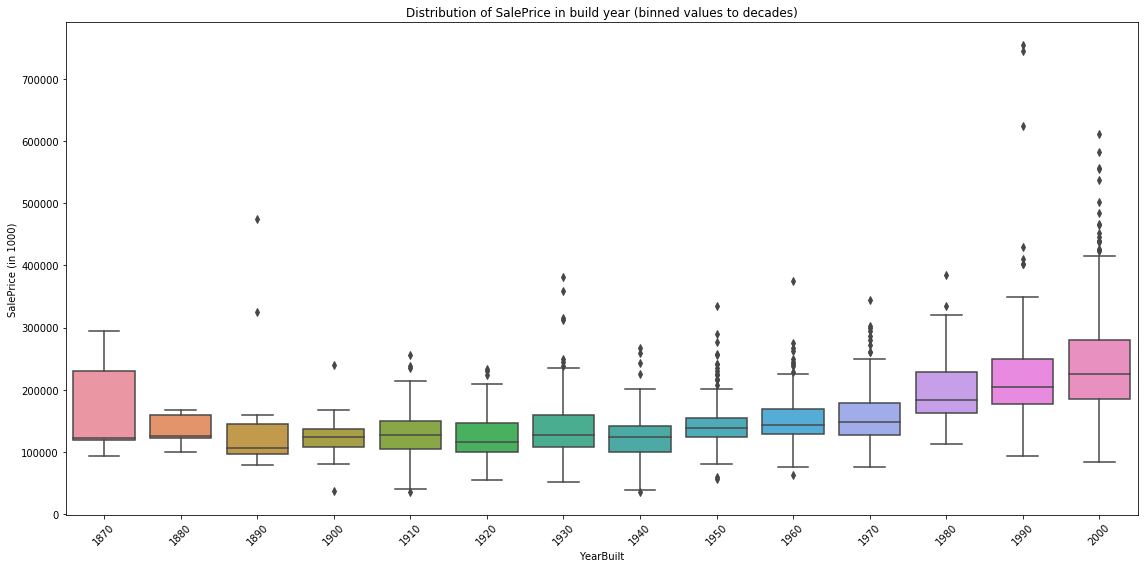

In [16]:

plt.figure(figsize=(16,5));
df_comb.groupby("YearBuilt").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in build year (binned values to decades)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_comb)
plt.title("Distribution of SalePrice in build year (binned values to decades)")
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

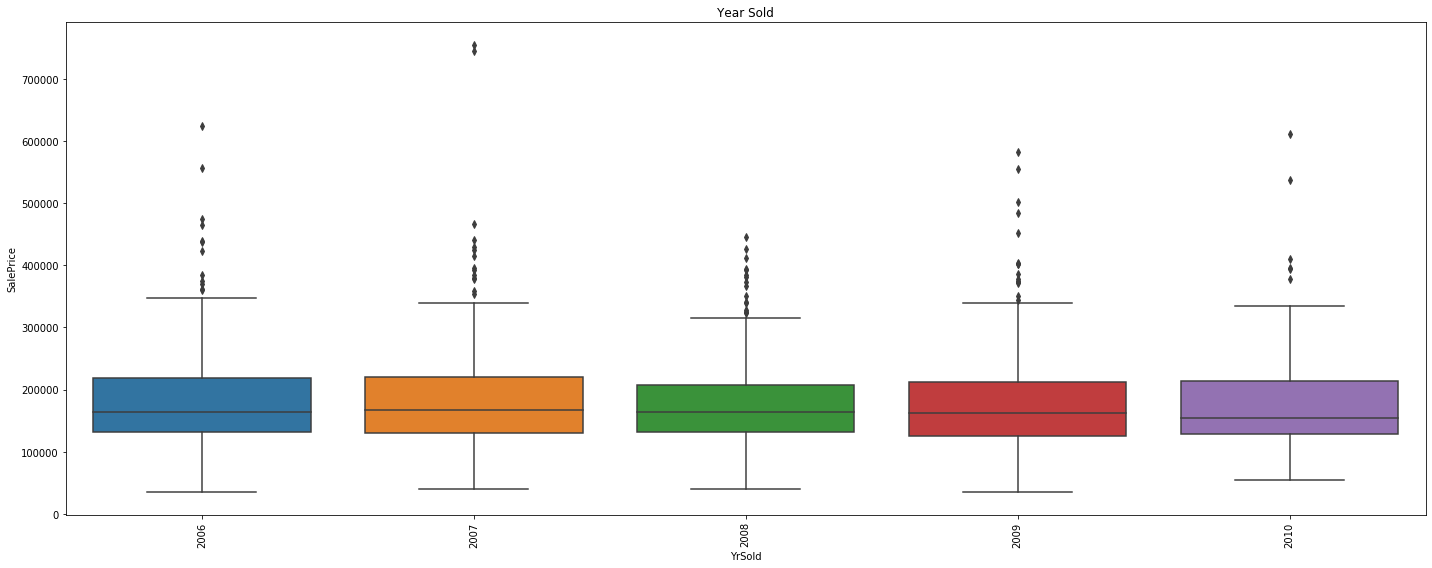

In [17]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x="YrSold", y="SalePrice", data=df_train)

plt.title("Year Sold")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

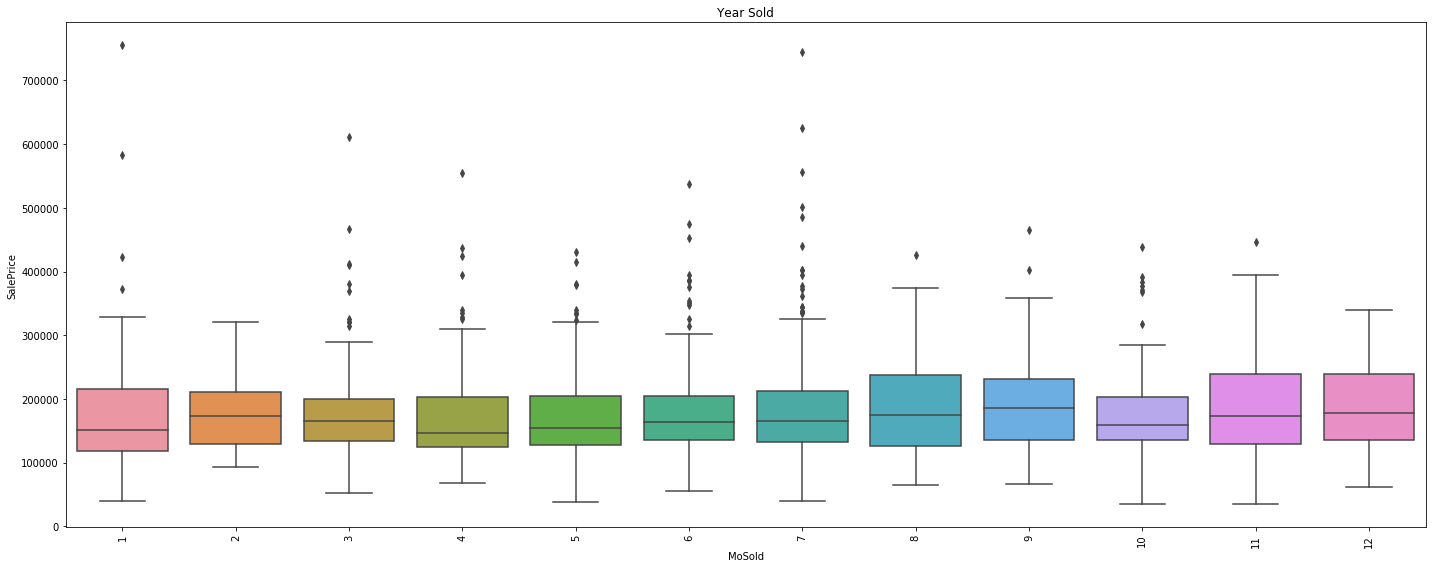

In [18]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x="MoSold", y="SalePrice", data=df_train)

plt.title("Year Sold")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

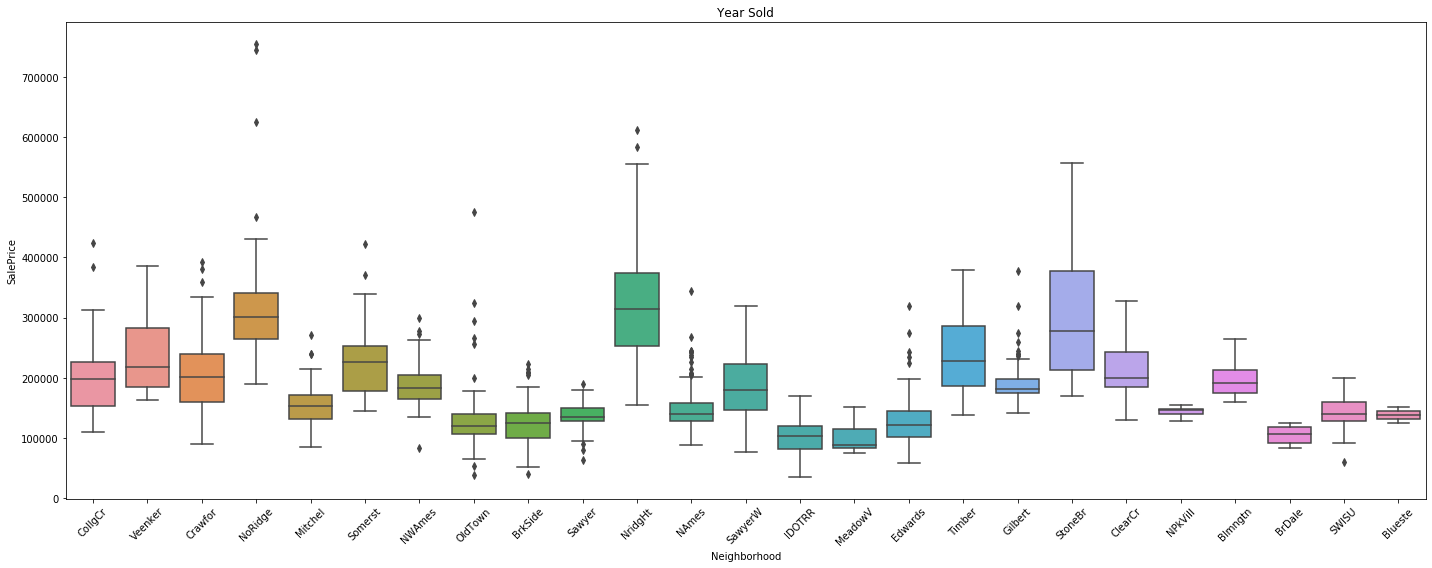

In [19]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train)

plt.title("Year Sold")
plt.ylabel("SalePrice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df_numerical = df_train.select_dtypes("number")
df_numerical.columns[1:]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

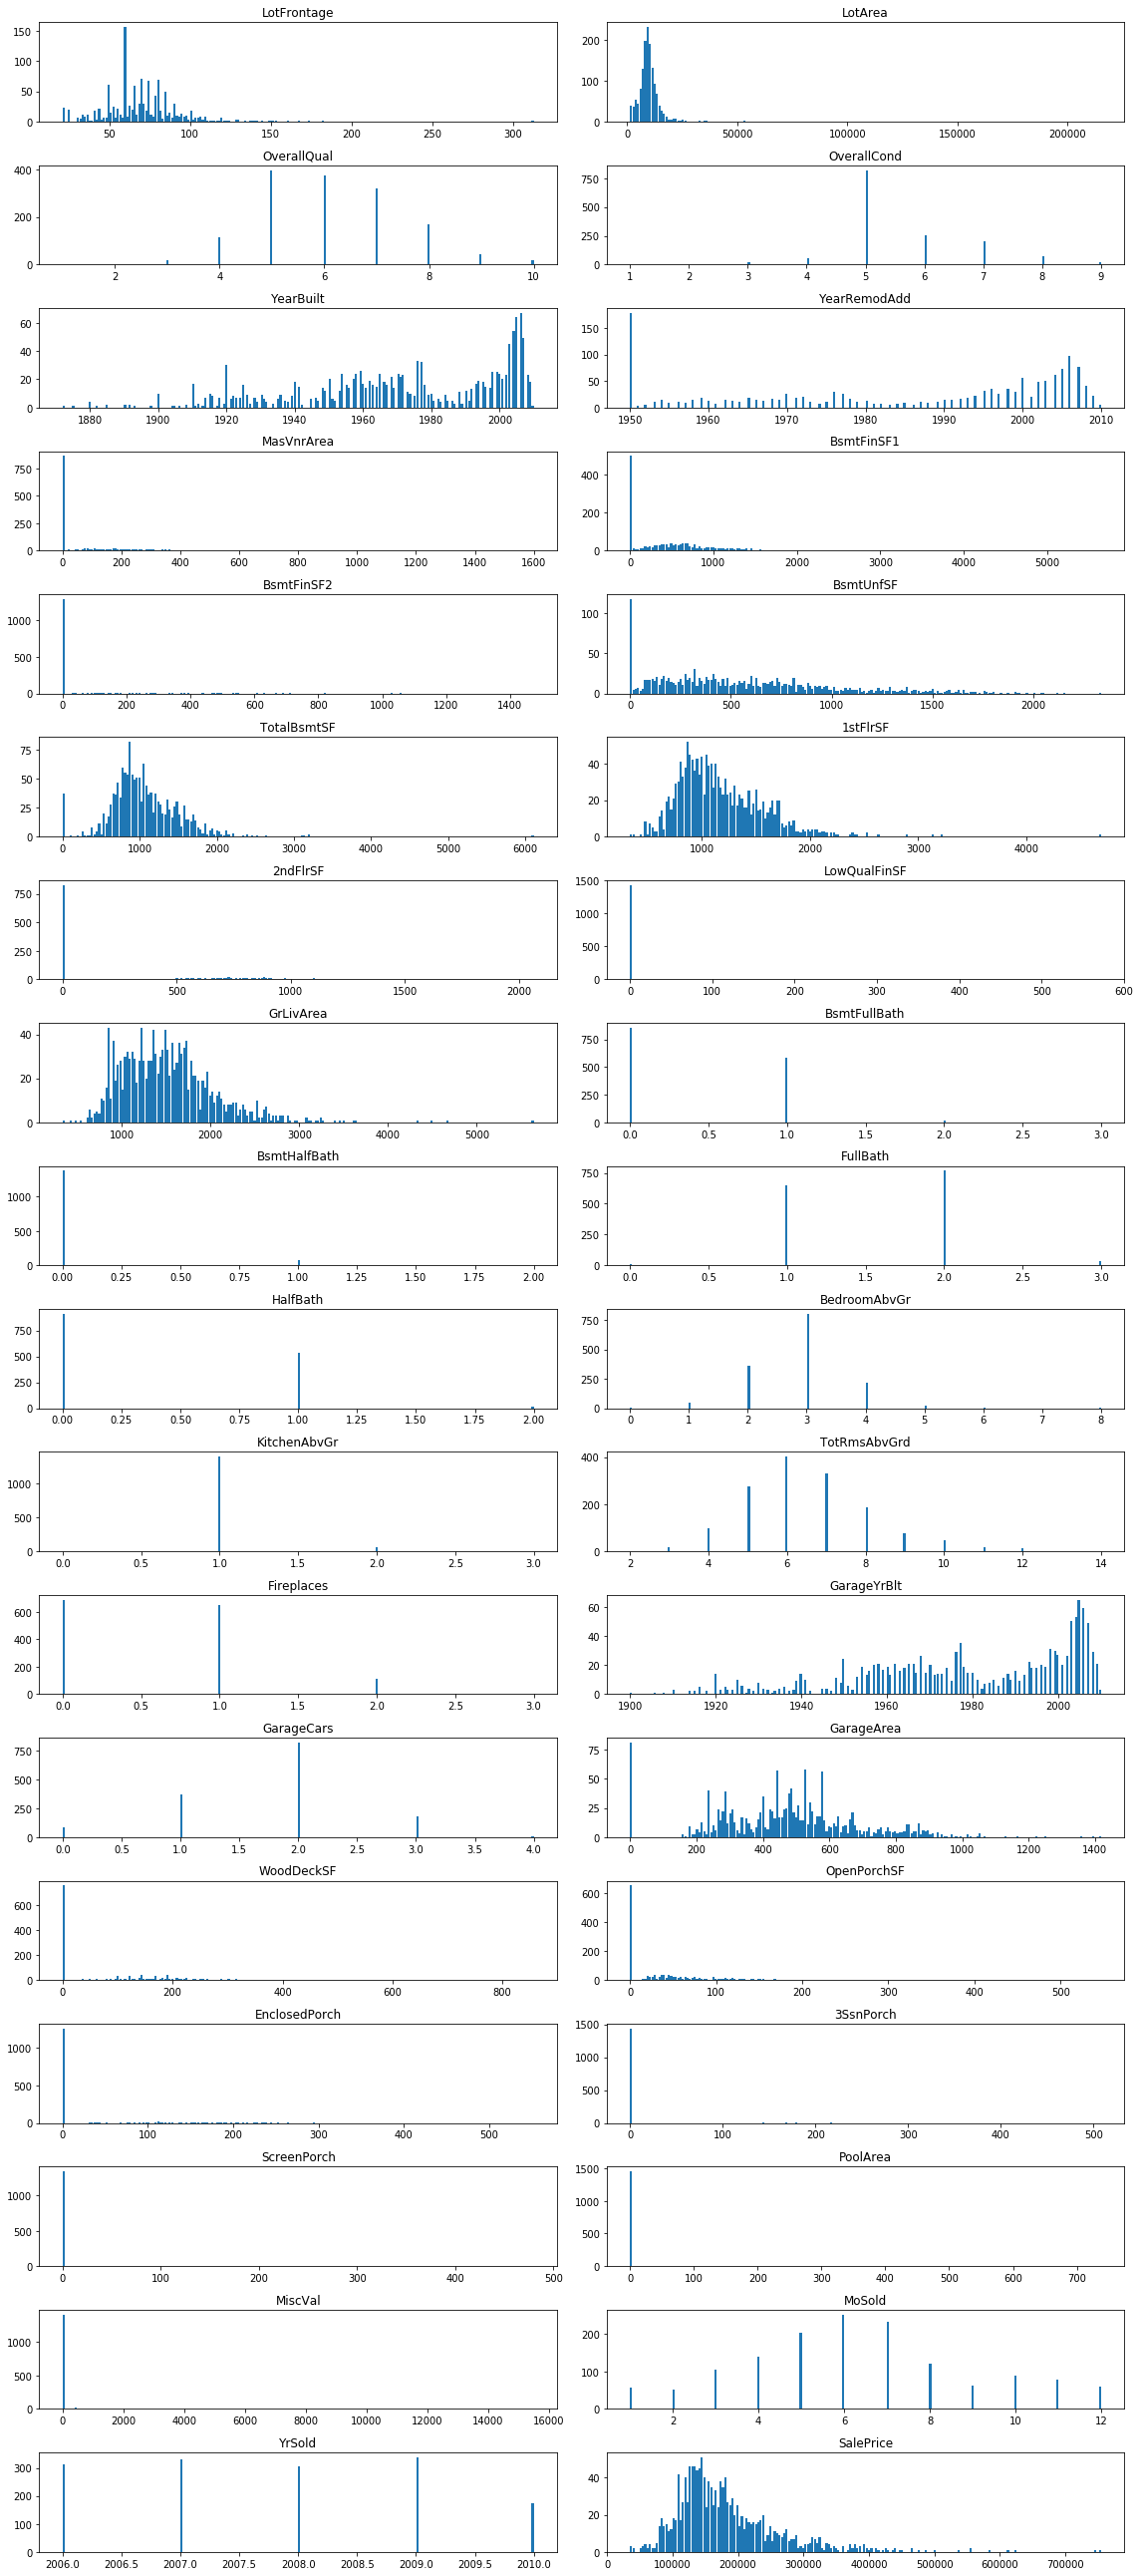

In [21]:
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(16,36))

for idx, col in enumerate(df_numerical.columns[1:]):
    df_numerical[col].plot(kind="hist", bins=200, rwidth=.9, title=col, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

## Sale Price Analysis

NameError: name 'df' is not defined

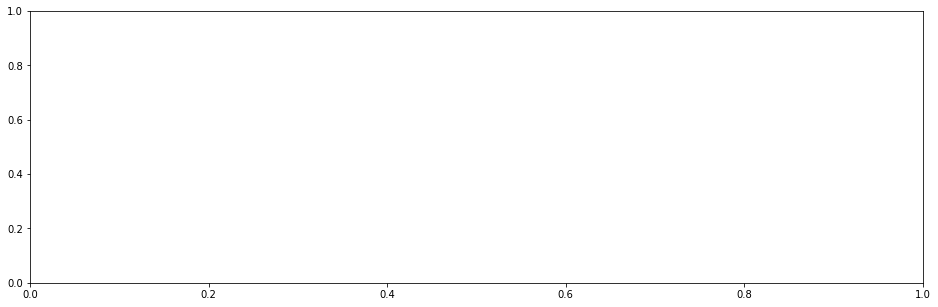

In [22]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(df['SalePrice'])

In [ ]:
f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
plt.figure(figsize=(14,6))
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [ ]:
# calculate percentiles and IQR
q25 = np.percentile(df_train.SalePrice, 25)
q75 = np.percentile(df_train.SalePrice, 75)
iqr = q75 - q25

# calculate normal and extreme upper and lower cut off
cut_off = iqr * 3
lower_extreme_outlier = q25 - cut_off 
upper_extreme_outlier = q75 + cut_off

print(f'Percentiles:\n25th  =  {q25}\n75th  =  {q75}\n\nIQR   =   {iqr}\nlower = {lower_extreme_outlier}\nupper =  {upper_extreme_outlier}')

In [ ]:
df_train[df_train.SalePrice > upper_extreme_outlier]

In [ ]:
print("SalePrice:")
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [ ]:
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [ ]:
LogSalePrice = df_train["SalePrice"].apply(np.log)
LogSalePrice.name = 'LogSalePrice'
print("Log SalePrice:")
print("Skewness: %f" % LogSalePrice.skew())
print("Kurtosis: %f" % LogSalePrice.kurt())

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

plt.subplot(1, 2, 2)
stats.probplot(LogSalePrice, plot=plt)
plt.title("Probability plot: LogSalePrice")
plt.show()

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
sns.distplot(LogSalePrice,fit=norm)

In [ ]:
df_train.SalePrice.describe()

# Data Pre-processing

## Missing Data Analysis

In [ ]:
# combine Train and Test set
df = pd.concat([df_train, df_test]).reset_index(drop=True).copy()
# df.drop("SalePrice",axis = 1, inplace=True)

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df.columns[df.isnull().sum() > 0].tolist()
sns.heatmap(df[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
print(col_missing_data)

## Handling Missing Data

In [ ]:
## Data that can be filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu',
                  'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                  'MiscFeature', 'PoolQC', 'MasVnrType', 'Exterior2nd'
                 ] 

Fill_with_zero = [ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'GarageCars', 
                  'GarageYrBlt', 'MasVnrArea', 'LotFrontage'
                 ]

Fill_with_mode = [ 'Electrical', 'Exterior1st',  'Functional', 
                  'KitchenQual',  'MSZoning', 'SaleType', 'Utilities'
                 ]

In [ ]:
for col in Fill_with_none:
    df[col].fillna("None", inplace=True)

In [ ]:
for col in Fill_with_zero:
    df[col].fillna(0, inplace=True)

In [ ]:
for col in Fill_with_mode:
    df[col].fillna(df[col].value_counts().idxmax(), inplace=True)

In [ ]:
col_missing_data = df.columns[df.isnull().sum() > 0].tolist()
col_missing_data

## Encoding

In [ ]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

In [ ]:
Norminal = ['MSZoning',  'LandContour', 'Heating',  'Electrical',  
            'LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',  
            'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [ ]:
Ordinal = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
           'BsmtFinType1', 'LandSlope', 'LotShape', 'PavedDrive', 
           'PoolQC', 'KitchenQual', 'Street', 'Alley', 
           'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 
           'GarageFinish', 'Fence', 'Utilities', 'CentralAir',
           'ExterQual', 'ExterCond', 'Functional']

### Ordinal

In [ ]:
print(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF', 'Utilities'])

In [ ]:
for col in ['KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageCond', 'GarageQual']:
    df[col] = df[col].replace(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,6).tolist()).astype(int)

for col in ['ExterQual', 'ExterCond', 'HeatingQC']:
    df[col] = df[col].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)

for col in ['BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].replace(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], np.arange(0,7).tolist()).astype(int)
    
df['Street'] = df.Street.replace(['Grvl', 'Pave'], np.arange(0,2).tolist()).astype(int)
df['Alley'] = df.Alley.replace(['None', 'Grvl', 'Pave'], np.arange(0,3).tolist()).astype(int)
df['PoolQC'] = df.PoolQC.replace(['None', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)
df['Functional'] = df.Functional.replace(['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], np.arange(0,9).tolist()).astype(int)
df['BsmtExposure'] = df.BsmtExposure.replace(['None', 'No', 'Mn', 'Av', 'Gd'], np.arange(0,5).tolist()).astype(int)
df['Fence'] = df.Fence.replace(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], np.arange(0,5).tolist()).astype(int)
df['Utilities'] = df.Utilities.replace(['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'], np.arange(0,5).tolist()).astype(int)
df['CentralAir'] = df.CentralAir.replace(['N', 'Y'], np.arange(0,2).tolist()).astype(int)
df['PavedDrive'] = df.PavedDrive.replace(['N', 'P', 'Y'], [0, 1, 2]).astype(int)
df['GarageFinish'] = df.GarageFinish.replace(['None', 'Unf', 'RFn', 'Fin'], np.arange(0,4).tolist()).astype(int)

df['LandContour'] = df.LandContour.replace(['Low', 'HLS' , 'Bnk', 'Lvl'], np.arange(0,4).tolist()).astype(int)
df['LandSlope'] = df.LandSlope.replace(['Sev', 'Mod', 'Gtl'], np.arange(0,3).tolist()).astype(int)
df['LotShape'] = df.LotShape.replace(['IR3', 'IR2', 'IR1', 'Reg'], np.arange(0,4).tolist()).astype(int)

In [ ]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

In [ ]:
[value for value in Ordinal if value in categoricals] 

### Norminal

In [ ]:
for category in categoricals:
    dummy = pd.get_dummies(df[category], prefix = category)
    df = pd.concat([df, dummy], axis = 1)
    df.drop(category, axis=1, inplace=True)

In [ ]:
df.select_dtypes(exclude=np.number).columns.tolist()

# Secondary Exploratory Data Analysis

In [ ]:
non_numerical = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
                 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
                 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
                 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
                 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
                'SalePrice']

In [ ]:
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

In [ ]:
fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

In [ ]:
plt.figure(figsize=(16,40));
corr = df.corr()['SalePrice']

# high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16,8));
corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.3)]

# high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

# Initial Testing With Various Regressor

## Data Splitting

In [ ]:
df = df[[c for c in df if c != 'SalePrice'] + ['SalePrice']]
print(df)

In [ ]:
df_train = df[df['SalePrice'].notnull()]

from sklearn.model_selection import train_test_split

X = df_train.loc[:,high_corr.index.tolist()[1:]].values
y = df_train.loc[:,high_corr.index.tolist()[0]].values

X_train, X_Valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

## XGBoost

## Random Tree Regressor

## Ridge regression

## Support Vector Regressor

## Lasso regression

# Feature Engineering

In [ ]:
feature_list = df.columns.tolist()
print(feature_list)

In [ ]:
df_train2 = pd.read_csv('./train.csv')
df_train2.columns

In [ ]:
df.corr()[df.corr()['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)

In [ ]:
df['FloorSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalFloorSF1'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# df['TotalSF1'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

print(df.corr()['SalePrice']['FloorSF'])
print(df.corr()['SalePrice']['TotalFloorSF1'])

In [ ]:
BsmtFinSF2

In [ ]:
df['hasFireplace'] = df['FireplaceQu'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasFireplace']

In [ ]:
df['hasGarage'] = df['GarageArea'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasGarage']

In [ ]:
df['hasBasement'] = df['BsmtExposure'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasBasement']

In [ ]:
df['hasPool'] = df['PoolQC'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasPool']

In [ ]:
df['hasFence'] = df['Fence'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasFence']

In [ ]:
df['hasFence'] = df['MiscFeature'].apply(lambda x : 0 if x == 0 else 1)
df.corr()['SalePrice']['hasFence']

In [ ]:
df['ExterScore'] = df['ExterCond'] * df['ExterQual']
df.corr()['SalePrice']['ExterScore']

In [ ]:
print(df[df['KitchenAbvGr'] > 1]['KitchenQual'].tolist())

In [ ]:
df['KitchenScore'] = df['KitchenAbvGr'] * df['KitchenQual'] 
df.corr()['SalePrice']['KitchenScore']

In [ ]:
df['TotalQual'] = df['KitchenQual'] + df['ExterQual'] + df['OverallQual']
df.corr()['SalePrice']['TotalQual']

In [ ]:
df['HouseArea'] = df['GrLivArea'] + df['GarageArea'] + df['OpenPorchSF'] + df['WoodDeckSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['PoolArea'] + df['MasVnrArea']
df.corr()['SalePrice']['HouseArea']

In [ ]:
df['hasMiscFeature'] = df_train2['MiscFeature'].apply(lambda x : 0 if pd.isnull(x) else 1)
df.corr()['SalePrice']['hasMiscFeature']

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_train2.head())

In [ ]:
df.corr()['SalePrice']['LotArea']

In [ ]:
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice')

In [ ]:
f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df["LotArea"],fit=norm)

In [ ]:
df["LotArea"] = df["LotArea"].apply(lambda x : np.log1p(x))

In [ ]:
f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df["LotArea"],fit=norm)

In [ ]:
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice')

In [ ]:
df['hasRenovate'] = df ['YearRemodAdd'] - df['YearBuilt']
df.corr()['SalePrice']['hasRenovate']

In [ ]:
df.corr()['SalePrice']['hasRenovate']

In [ ]:
df_train2[df_train2['LotArea'] < 5000]['LotArea']

In [ ]:
df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)

In [ ]:
df.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
sns.boxplot(data = df_train, x='MSSubClass', y='SalePrice')

    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
   120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150  1-1/2 STORY PUD - ALL AGES
   160  2-STORY PUD - 1946 & NEWER
   180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190  2 FAMILY CONVERSION - ALL STYLES AND AGES

# Testing With New Data

In [ ]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

# Data Pre-Processing

# Prediction

## XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFR.fit(X_train, y_train)

In [ ]:
y_pred = RFR.predict(X_Valid)

In [ ]:
sns.scatterplot(y_valid, y_pred)

In [ ]:
sum((y_pred-y_valid)**2)

In [ ]:
# shuffle here
# k-fold cross validation

from sklearn.model_selection import train_test_split

X = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

X_train, X_Valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
RFR2 = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFR2.fit(X_train, y_train)

In [ ]:
y_pred = RFR2.predict(X_Valid)

In [ ]:
sns.scatterplot(y_valid, y_pred)

In [ ]:
sum((y_pred-y_valid)**2)